In [2]:
import matplotlib.pyplot as plt




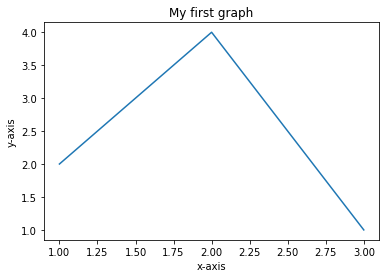

In [13]:
x=[1,2,3]
y=[2,4,1]
plt.plot(x,y) # plotting the points
plt.xlabel("x-axis") # naming the x axis
plt.ylabel("y-axis")  # naming the y axis
plt.title("My first graph") # title of the graph
plt.show()

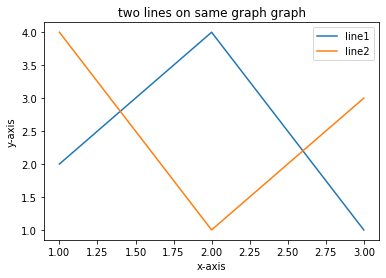

In [3]:
x=[1,2,3]
y=[2,4,1]
plt.plot(x,y,label="line1") # plotting the points
x1=[1,2,3]
y1=[4,1,3]
plt.plot(x1,y1,label="line2")

plt.xlabel("x-axis") # naming the x axis
plt.ylabel("y-axis")  # naming the y axis
plt.title("two lines on same graph graph") # title of the graph
plt.legend()
plt.show()

In [51]:
class Vertex:
    def __init__(self,x):
        self._elements=x
    def element(self):
        return self._element
    
        

In [52]:
V=Vertex(1)

In [53]:
class Edge:
    def __init__(self,u,v,x):
        self._origin=u
        self._destination=v
        self._element=x
    def endpoints(self):
        return (self._origin,self._destination)
    def opposite(self,v):
        return  self._destination if v is self._origin else self._origin
   

In [118]:
class Graph:
    def __init__(self,directed=False):
        self.outgoing={}
        self.incoming={} if directed else self.outgoing # key ,value pair of vertex and edges
    def is_directed(self):
        return self.incoming is not self.outgoing
    
    def vertex_count(self):
        return len(self.outgoing)
    def vertices(self):
        return self.outgoing.keys()
            
    def edge_count(self):
        total=sum(len(self.outgoing[v]) for v in self.outgoing)
        
        if self.is_directed():
            return total
        else:
            
            return (total//2)
    def edges(self):
        result=set()
        for secondary_map in self.outgoing.values():
            result.update(secondary_map.values())
        return result
        
    def get_edge(self,u,v):
        return self.outgoing[u].get(v)
    
    def degree(self,v,outgoing=True):
        adj=self.outgoing if outgoing else self.incoming
        return len(adj[v])
    
    def incident_edges(self,v, outgoing=True):
        adj=self.outgoing if outgoing else self.incoming
        for edge in adj[v].values():
            yield edge
    
    def insert_vertex(self,x=None):
        v=Vertex(x)
        self.outgoing[v]={}
        if self.is_directed():
            self.incoming[v]={}
        return v
    def insert_edge(self,u,v,x=None):
        e= Edge(u,v,x)
        self.outgoing[u][v]=e
        self.outgoing[v][u]=e
                          
            

In [119]:
G=Graph()

In [120]:
G.outgoing

{}

In [121]:
a=G.insert_vertex('a')

In [122]:
b=G.insert_vertex('b')


In [123]:
G.insert_edge(a,b)

In [124]:
G.get_edge(a,b)

In [125]:
G.degree(a)

1

In [126]:
G.edge_count()

1

In [127]:
G.is_directed()

False

In [128]:
G.incident_edges(a)

<generator object Graph.incident_edges at 0x7fabc40b5af0>

In [129]:
G.outgoing

{<__main__.Vertex at 0x7fabc40b3160>: {<__main__.Vertex at 0x7fabc40b3a90>: <__main__.Edge at 0x7fabc40b3630>},
 <__main__.Vertex at 0x7fabc40b3a90>: {<__main__.Vertex at 0x7fabc40b3160>: <__main__.Edge at 0x7fabc40b3630>}}

In [130]:
G.vertices()

dict_keys([<__main__.Vertex object at 0x7fabc40b3a90>, <__main__.Vertex object at 0x7fabc40b3160>])

In [5]:
from collections import defaultdict

In [16]:
class Graph:
    def __init__(self):
        self.graph=defaultdict(list)
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
        
        
    def DFSUTIL(self,v,visited):
        visited[v]=True
        print(v)
        for i in self.graph[v]:
            if visited[i]==False:
                self.DFSUTIL(i,visited)
    
    def DFS(self):
        V=len(self.graph)
        visited=[False]*V
            
            
        for i in range(V):
            if visited[i]==False:
                self.DFSUTIL(i,visited)

In [17]:
g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 

In [18]:
g.DFS()

0
1
2
3


In [9]:
from collections import defaultdict
class Graph:
    def __init__(self):
        self.graph=defaultdict(list)
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
        
    def BFS(self,s):
        V=len(self.graph)
        visited=[False]*V
        queue=[]
        queue.append(s)
        visited[s]=True
        while(queue):
            s=queue.pop(0)
            print(s,end=' ')
            for i in self.graph[s]:
                if visited[i]==False:
                    queue.append(i)
                    visited[i]=True
                
                

In [10]:

g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 


In [12]:
g.BFS(2)

2 0 3 1 

#### Topological Sorting

In [23]:
from collections import defaultdict
class Graph:
    def __init__(self,vertices):
        self.graph=defaultdict(list)
        self.v=vertices
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
        
    def topologicalsorting(self):
        visited=[False]*self.v
        stack=[]
        for i in range(self.v):
            if visited[i]==False:
                self.topological(i,visited,stack)
        print(stack)
        
    def topological(self,i,visited,stack):
        visited[i]=True
        for v in self.graph[i]:
            if visited[v]==False:
                self.topological(v,visited,stack)
        stack.insert(0,i)    

In [24]:
g= Graph(6) 
g.addEdge(5, 2); 
g.addEdge(5, 0); 
g.addEdge(4, 0); 
g.addEdge(4, 1); 
g.addEdge(2, 3); 
g.addEdge(3, 1); 

In [25]:
g.topologicalsorting()

[5, 4, 2, 3, 1, 0]


#### Kahn's method of toplogical sorting

In [6]:
from collections import defaultdict
class Graph:
    def __init__(self,vertices):
        self.graph=defaultdict(list)
        self.v=vertices
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
    def topological_sort(self):
        in_degree=[0]*self.v
        cnt=0.
        for i in self.graph:      ## finding indegree of each vertices
            for j in self.graph[i]:
                in_degree[j]+=1
        queue=[]
        for i in range(self.v):
            if in_degree[i]==0:
                queue.append(i)
        top_order=[]
        
        while queue:
            u=queue.pop(0)
            top_order.append(u)
            for i in self.graph[u]:
                in_degree[i]-=1
                if in_degree[i]==0:
                    queue.append(i)
            cnt+=1
        if cnt!=self.v:
            print("exist cycle")
        else:
            print(top_order)

In [7]:
g= Graph(6) 
g.addEdge(5, 2); 
g.addEdge(5, 0); 
g.addEdge(4, 0); 
g.addEdge(4, 1); 
g.addEdge(2, 3); 
g.addEdge(3, 1); 
  

In [8]:
g.topological_sort()

[4, 5, 2, 0, 3, 1]


## Dijkstra's algorithm for shortest path

In [70]:
import sys
class Graph:
    def __init__(self,V):
        self.v=V
        self.graph=[[0 for columns in range(V)] for rows in range(V)]
        
        
    def Dijkstra(self,source):
        dist=[sys.maxsize]*self.v
        dist[source]=0
        sptset=[False]*self.v
        for i in range(self.v):
            u=self.findmin(sptset,dist)
            sptset[u]=[True]
            for j in range(self.v):
                if self.graph[u][j]>0 and sptset[j]==False and dist[j]>dist[u]+self.graph[u][j]:
                    dist[j]=dist[u]+self.graph[u][j]
        self.printgraphsol(dist)
       
    
    def findmin(self,sptset,dist):
        min = sys.maxsize
        min_index=-1
        for i in range(self.v): 
            if dist[i] < min and sptset[i] == False: 
                min = dist[i] 
                min_index = i 
  
        return min_index 
    def printgraphsol(self,dist):
        print ("Vertex        Distance from Source")
        for node in range(self.v): 
            print (node,"               "  , dist[node]) 
        
        
        
        

In [71]:

g  = Graph(9) 
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
           [4, 0, 8, 0, 0, 0, 0, 11, 0], 
           [0, 8, 0, 7, 0, 4, 0, 0, 2], 
           [0, 0, 7, 0, 9, 14, 0, 0, 0], 
           [0, 0, 0, 9, 0, 10, 0, 0, 0], 
           [0, 0, 4, 14, 10, 0, 2, 0, 0], 
           [0, 0, 0, 0, 0, 2, 0, 1, 6], 
           [8, 11, 0, 0, 0, 0, 1, 0, 7], 
           [0, 0, 2, 0, 0, 0, 6, 7, 0] 
          ]; 
  
g.Dijkstra(0); 


Vertex        Distance from Source
0                 0
1                 4
2                 12
3                 19
4                 21
5                 11
6                 9
7                 8
8                 14
